# NLTK
Natural Language Toolkit, is a Python package that you can use for for natural language processing.
It is one of the most used libraries for natural language processing and computational linguistics.
This is one of the most usable and mother of all NLP libraries

In [1]:
# Install the NLTK library
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import nltk
# nltk.download('all')

# Text Processing on imdb dataset

In [3]:
import pandas as pd

In [4]:
imdb = pd.read_csv('IMDB Dataset.csv')

In [5]:
imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
imdb['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

### 1) To convert text to lower case

In [7]:
# To convert it to lower case
imdb['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [8]:
# apply on complete dataset
imdb['review'] = imdb['review'].str.lower()

In [9]:
imdb

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


## 2) To remove html tags

In [10]:
# To remove html tags
import re
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text) # sub() function replaces the matches with the text of your choice,re.sub("\s", "9", txt)
    # return re.sub('<.*>','',text)
    
def remove_html1(text):
    return re.sub('\n','',text)

In [15]:
# Multiline text
text = """<html><body> <p> Basically theres a family where a little boy </p> (Jake) thinks theres a zombie in his closet & his parents are fighting all the time.<br /><br />
This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you are going to make a film 
you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. 
And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, 
and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs.
 As for the shots with Jake:just ignore them."""

text2 = "<html><body> <p> Basically theres a family where a little boy </p> (Jake) thinks"

In [17]:
t1 = remove_html(text)
t1

'  Basically theres a family where a little boy  (Jake) thinks theres a zombie in his closet & his parents are fighting all the time.\nThis movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you are going to make a film \nyou must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. \nAnd then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, \nand instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs.\n As for the shots with Jake:just ignore them.'

In [18]:
remove_html1(t1)

'  Basically theres a family where a little boy  (Jake) thinks theres a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you are going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake:just ignore them.'

In [19]:
# apply on imdb
imdb['review'] = imdb['review'].apply(remove_html)

In [20]:
imdb['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

### 3) Remove url

In [22]:
# Remove url
import re
def remove_url(text):
    pattern = re.compile('https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [23]:
t1 = 'check the notebook1 https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download'
t2 = 'check the notebook2 http://www.kaggle.com/datasets/lakshmi25npathi'
t3 = 'check the notebook3 www.kaggle.com/datasets/lakshmi25npathi'

In [24]:
remove_url(t3)

'check the notebook3 '

## 4) Remove Punctuation

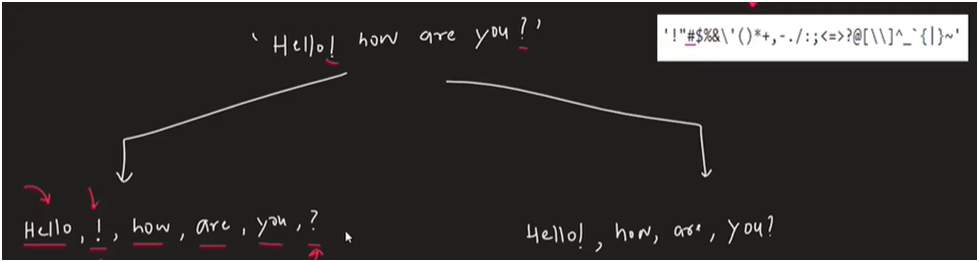

In [25]:
import string

In [27]:
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

translate(): To translate the characters in the string

maketrans() function is used to construct the transition table i.e specify the list of characters that need to be replaced in the whole string or the characters that need to be deleted from the string.

maketrans(str1, str2, str3)

str1 : Specifies the list of characters that need to be replaced.
str2 : Specifies the list of characters with which the characters need to be replaced.
str3 : Specifies the list of characters that needs to be deleted.

In [33]:
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

In [34]:
t1 = 'My name. is. nisarg?'

In [35]:
remove_punc(t1)

'My name is nisarg'

## Apply on twitter dataset

In [36]:
twitter = pd.read_csv('twitter_train1.csv')


In [38]:
twitter.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [39]:
twitter['tweet'] = twitter['tweet'].apply(remove_punc)
twitter['tweet'].head()

0     user when a father is dysfunctional and is so...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model   i love u take with u all the time in u...
4                 factsguide society now    motivation
Name: tweet, dtype: object

## 5) Spelling correction

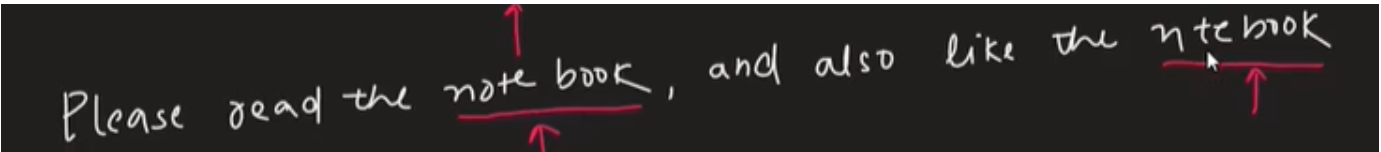

In [ ]:
# To install textblob library
#! pip install textblob

In [41]:
from textblob import TextBlob

In [44]:
inc_text = 'I am not able to undertnd'
t1 = TextBlob(inc_text)
t1.correct().string

'I am not able to understand'

## 6) Remove stop words

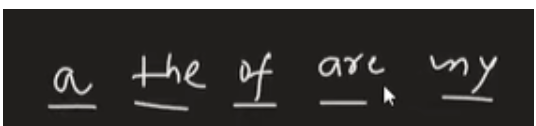

In [45]:
from nltk.corpus import stopwords

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/labsuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
# To get sopwords in english
# stopwords.words('english')

In [49]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    print(x)
    new_text.clear()
    return " ".join(x)

In [50]:
text = "The gross non-performing assets (NPAs) as a percentage of total loans stood at 9.3% as on March 2019"

In [51]:
remove_stopwords(text)

['The', 'gross', 'non-performing', 'assets', '(NPAs)', '', '', 'percentage', '', 'total', 'loans', 'stood', '', '9.3%', '', '', 'March', '2019']


'The gross non-performing assets (NPAs)   percentage  total loans stood  9.3%   March 2019'

## 7) Tokenization
Tokenization is one of the first step in any NLP pipeline. Tokenization is nothing but splitting the raw text into small chunks of words or sentences, called tokens.

Natural Language Toolkit (NLTK) is library written in python for natural language processing.

In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/labsuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
# split into sentences
from nltk.tokenize import sent_tokenize
text = """Characters like periods, exclamation point and newline char are used to separate the sentences. But one drawback with split() method, that we can only use one separator at a time! So sentence tonenization wont be foolproof with split() method."""
sent_tokenize(text)

['Characters like periods, exclamation point and newline char are used to separate the sentences.',
 'But one drawback with split() method, that we can only use one separator at a time!',
 'So sentence tonenization wont be foolproof with split() method.']

In [54]:
# split into sentences
from nltk import sent_tokenize
sentences = """This is financial Report of 2019-2020. The share of large borrowers in Indian banks."""
sentences = sent_tokenize(sentences)
print(sentences)

['This is financial Report of 2019-2020.', 'The share of large borrowers in Indian banks.']


In [55]:
# split into words
from nltk import word_tokenize
sentence = 'This is financial Report of 2019-2020'
word = word_tokenize(sentence)
print(word)

['This', 'is', 'financial', 'Report', 'of', '2019-2020']


## Tokenization Using spaCy

In [ ]:
# spaCy is an open-source software library for advanced natural language processing, 
# written in the programming languages Python and Cython
# In spaCy we create language model object, which then used for word and sentence tokenization
#Syntax to install spaCy library and English model is as below

# !pip install spacy
# !python -m spacy download en

In [56]:
# Word toknization

# Load English model from spacy
from spacy.lang.en import English

# Load English tokenizer. 
# nlp object will be used to create 'doc' object which uses preprecoessing pipeline's components such as tagger, parser, NER and word vectors
nlp = English()

text = """There are multiple ways we can perform tokenization on given text data. We can choose any method based on langauge, library and purpose of modeling."""

# Now we will process above text using 'nlp' object. Which is use to create documents with linguistic annotations and various nlp properties
my_doc = nlp(text)

# Above step has already tokenized our text but its in doc format, so lets write for loop to create list of it
token_list = []
for token in my_doc:
    token_list.append(token.text)

print(token_list)

['There', 'are', 'multiple', 'ways', 'we', 'can', 'perform', 'tokenization', 'on', 'given', 'text', 'data', '.', 'We', 'can', 'choose', 'any', 'method', 'based', 'on', 'langauge', ',', 'library', 'and', 'purpose', 'of', 'modeling', '.']


In [57]:
# Sentence toknization

# Load English tokenizer, tager, parser, NER and word vectors
nlp = English()

# Create the pipeline 'sentencizer' component
sbd = nlp.create_pipe('sentencizer')

# Add component to the pipeline
nlp.add_pipe(sbd)
# nlp.add_pipe('sentencizer')

text = """Characters like periods, exclamation point and newline char are used to separate the sentences. But one drawback with split() method, that we can only use one separator at a time! So sentence tonenization wont be foolproof with split() method."""

# nlp object is used to create documents with linguistic annotations
doc = nlp(text)

# Create list of sentence tokens

sentence_list =[]
for sentence in doc.sents:
    sentence_list.append(sentence.text)
print(sentence_list)

['Characters like periods, exclamation point and newline char are used to separate the sentences.', 'But one drawback with split() method, that we can only use one separator at a time!', 'So sentence tonenization wont be foolproof with split() method.']


## 8) Stemming & Lemmatization
Stemming

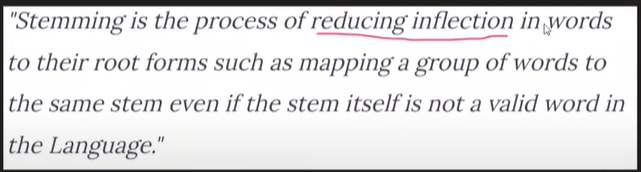

In [58]:
import nltk
from nltk.stem import PorterStemmer
# nltk.download("punkt")

In [60]:
# Initialize Python porter stemmer
ps = PorterStemmer()

def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [61]:
text = 'walk walking walked walk'
stem_words(text)

'walk walk walk walk'

In [62]:
text = 'probably my favourite movie is PK'
stem_words(text)

'probabl my favourit movi is PK'

## Lemmatization
It is slow comapare to stemming

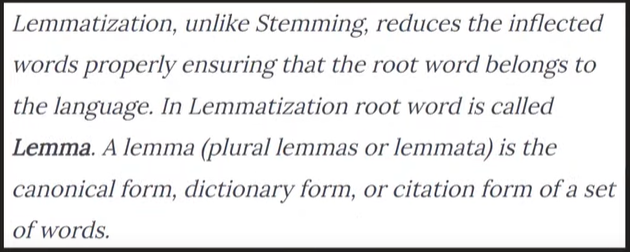

In [63]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
# nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /home/labsuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [65]:
# Initialize wordnet lemmatizer
wnl = WordNetLemmatizer()

def lem_words(text):
  return " ".join([wnl.lemmatize(word, pos="v") for word in text.split()])

In [66]:
text = 'walk walking walked walk'
lem_words(text)

'walk walk walk walk'

In [67]:
text = 'probably my favourite movie is PK'
wnl.lemmatize(text, pos="v")

'probably my favourite movie is PK'

# 9) Pos_tagging

In [68]:
#pos_tagging - pos_tag
import nltk
from nltk import pos_tag

In [69]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/labsuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [70]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/labsuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [71]:
text = 'Simplilearn is a great Machine Learning platform'
tokens = nltk.word_tokenize(text)
print(tokens)


['Simplilearn', 'is', 'a', 'great', 'Machine', 'Learning', 'platform']


In [72]:
postag = pos_tag(tokens)
print(postag)

[('Simplilearn', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('Machine', 'NNP'), ('Learning', 'NNP'), ('platform', 'NN')]


In [79]:
# nltk.download('tagsets')
# nltk.help.brown_tagset()

In [73]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [74]:
text = 'I left the room'
tokens = nltk.word_tokenize(text)
print(tokens)
postag = pos_tag(tokens)
print(postag)


['I', 'left', 'the', 'room']
[('I', 'PRP'), ('left', 'VBD'), ('the', 'DT'), ('room', 'NN')]


In [75]:
text = 'left of the room'
tokens = nltk.word_tokenize(text)
print(tokens)
postag = pos_tag(tokens)
print(postag)

['left', 'of', 'the', 'room']
[('left', 'NN'), ('of', 'IN'), ('the', 'DT'), ('room', 'NN')]
